# Baseline Analysis

Here, I will analyze the baseline models. In order to understand the baseline for each genre, I will conduct these analyses on the model for each genre:

1. Genre coherence score comparison.
2. Genre perplexity score comparison.
3. Genre computation time comparison.
4. Topic examination.
5. Word association examination.

In [41]:
# Import packages
from gensim.models import LdaModel
import matplotlib.pyplot as plt
import pandas as pd
from wordcloud import WordCloud

# Import data
data = pd.read_csv("../../../data/optimization/sampled/baseline/baseline_performances.csv")

colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown']

## Coherence Score Comparison

Coherence is a metric that helps to identify the human interpretability of the topics in a given topic model. For this analysis, I will compare the baseline coherence scores for each of the genres. This will help me to understand how well the vocabulary in different genres can be clustered into topics.

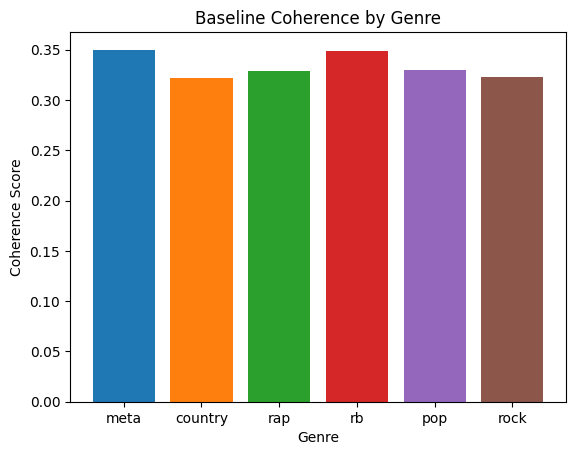

In [42]:
# Get coherence score
coherences = data.coherence.to_list()
genres = data.genre.to_list()


plt.bar(genres, coherences, color=colors)
plt.title("Baseline Coherence by Genre")
plt.xlabel("Genre")
plt.ylabel("Coherence Score")
plt.savefig("../../../data/analysis/sampled/baseline/baseline_coherence.png")
plt.show()

## Perplexity Examination

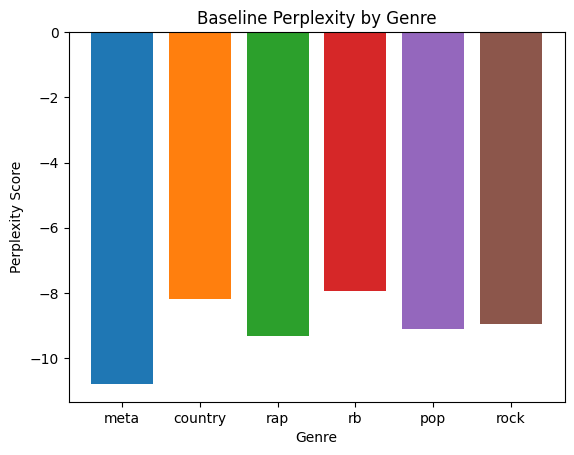

In [43]:
perplexities = data.perplexity.to_list()

plt.bar(genres, perplexities, color=colors)
plt.title("Baseline Perplexity by Genre")
plt.xlabel("Genre")
plt.ylabel("Perplexity Score")
plt.savefig("../../../data/analysis/sampled/baseline/baseline_perplexity.png")
plt.show()

## Computation Time

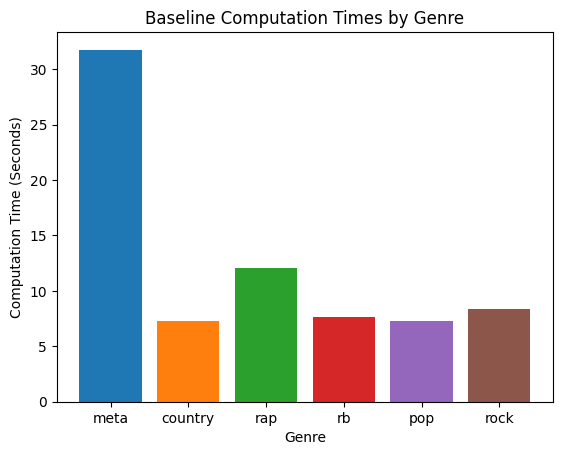

In [44]:
times = data.time.to_list()

plt.bar(genres, times, color=colors)
plt.title("Baseline Computation Times by Genre")
plt.xlabel("Genre")
plt.ylabel("Computation Time (Seconds)")
plt.savefig("../../../data/analysis/sampled/baseline/baseline_computation_time.png")
plt.show()

## Topic Examination

To understand the quality of the topics, I will examine the top four topics for each genre of music in word clouds. This will help me to be able to understand the actual human interpretability of the topics the models have clustered together.

NUM meta TOPICS: 4
NUM country TOPICS: 4
NUM rap TOPICS: 4
NUM rb TOPICS: 4
NUM pop TOPICS: 4
NUM rock TOPICS: 4
4
[{'genre': 'meta', 'topic': 4, 'word': 'dream', 'frequency': 0.057477806}, {'genre': 'meta', 'topic': 4, 'word': 'head', 'frequency': 0.05610112}, {'genre': 'meta', 'topic': 4, 'word': 'mind', 'frequency': 0.044298682}, {'genre': 'meta', 'topic': 4, 'word': 'people', 'frequency': 0.043498084}, {'genre': 'meta', 'topic': 4, 'word': 'da', 'frequency': 0.039557196}, {'genre': 'meta', 'topic': 4, 'word': 'dance', 'frequency': 0.033560988}, {'genre': 'meta', 'topic': 4, 'word': 'room', 'frequency': 0.019475242}, {'genre': 'meta', 'topic': 4, 'word': 'boom', 'frequency': 0.015947653}, {'genre': 'meta', 'topic': 4, 'word': 'hello', 'frequency': 0.012460594}, {'genre': 'meta', 'topic': 4, 'word': 'bed', 'frequency': 0.012129607}, {'genre': 'meta', 'topic': 4, 'word': 'honey', 'frequency': 0.011766442}, {'genre': 'meta', 'topic': 4, 'word': 'back', 'frequency': 0.011065243}, {'genr

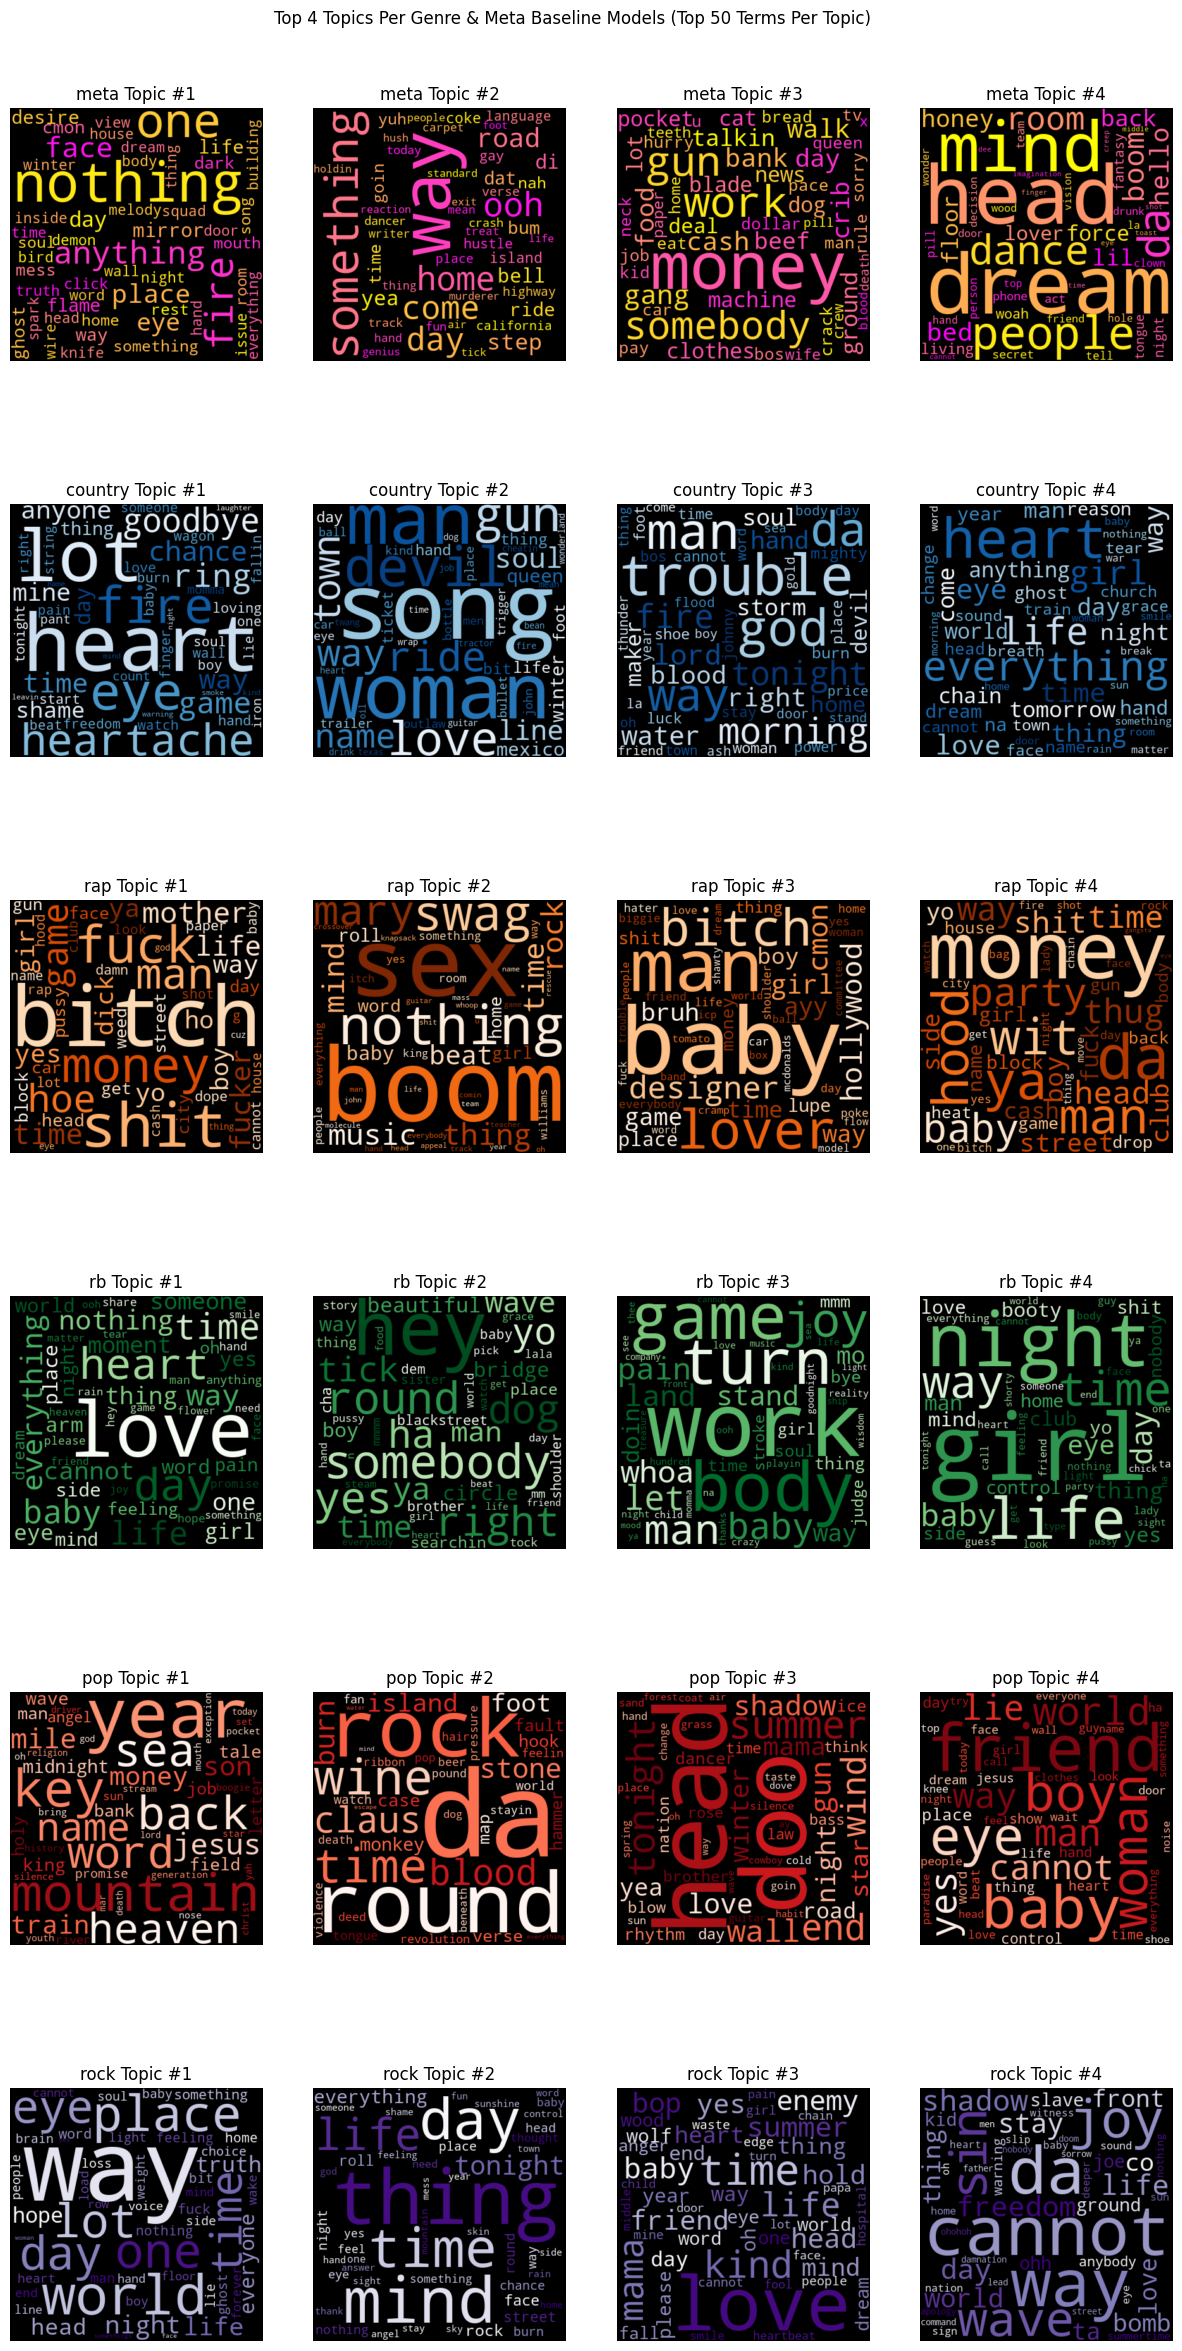

In [45]:
# Load models
meta_model = LdaModel.load("../../../models/sampled/baseline/meta_baseline.model")
country_model = LdaModel.load("../../../models/sampled/baseline/country_baseline.model")
rap_model = LdaModel.load("../../../models/sampled/baseline/rap_baseline.model")
rb_model = LdaModel.load("../../../models/sampled/baseline/rb_baseline.model")
pop_model = LdaModel.load("../../../models/sampled/baseline/pop_baseline.model")
rock_model = LdaModel.load("../../../models/sampled/baseline/rock_baseline.model")

# Get topics
meta_topics = meta_model.show_topics(num_topics=4, num_words=50, formatted=False)
country_topics = country_model.show_topics(num_topics=4, num_words=50, formatted=False)
rap_topics = rap_model.show_topics(num_topics=4, num_words=50, formatted=False)
rb_topics = rb_model.show_topics(num_topics=4, num_words=50, formatted=False)
pop_topics = pop_model.show_topics(num_topics=4, num_words=50, formatted=False)
rock_topics = rock_model.show_topics(num_topics=4, num_words=50, formatted=False)

# Make word clouds

fig, axes = plt.subplots(6, 4, figsize=(15, 6 * 5))

topics = []
colors = ['spring', 'Blues', 'Oranges', 'Greens', 'Reds', 'Purples']

def get_topics(genre, genre_topics, row):
    print(f"NUM {genre} TOPICS: {len(genre_topics)}")
    for i, topic in enumerate(genre_topics):
        dict_words = dict(topic[1])

        wordcloud = WordCloud(width=400, height=400, 
                            background_color='black',
                            colormap=colors[row], 
                            min_font_size=10).generate_from_frequencies(dict_words)
        
        axes[row, i].imshow(wordcloud, interpolation='bilinear')
        axes[row, i].axis("off")
        axes[row, i].set_title(f"{genre} Topic #{i+1}")
        
    return [{'genre': genre, 'topic': i+1, 'word': word, "frequency": freq} for word, freq in topic[1]]

topics.extend(get_topics("meta", meta_topics, 0))
topics.extend(get_topics("country", country_topics, 1))
topics.extend(get_topics("rap", rap_topics, 2))
topics.extend(get_topics("rb", rb_topics, 3))
topics.extend(get_topics("pop", pop_topics, 4))
topics.extend(get_topics("rock", rock_topics, 5))
print(len(topics[0]))
print(topics)
fig.suptitle("Top 4 Topics Per Genre & Meta Baseline Models (Top 50 Terms Per Topic)", y=0.9)
plt.savefig("../../../data/analysis/sampled/baseline/baseline_genre_topics.png")
plt.show()